In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = '/content/Active Users (4) (1) (1) (1).csv'
data = pd.read_csv(file_path)
cleaned_data = data.map(lambda x: str(x) if not isinstance(x, str) else x)
new_users = {}
resurrected_users = {}
retained_users = {}
wau = {}
churned_users = {}
quick_ratio = {}
retention_rate_ratio = {}


In [14]:
week_columns = [f'w{i}' for i in range(1, 57)]

# Get unique user IDs across all weeks
unique_users = set()

for column in week_columns:
    unique_users.update(cleaned_data[column].dropna().unique())

total_unique_users = len(unique_users)

print(f"Total number of unique users active across all weeks: {total_unique_users}")

Total number of unique users active across all weeks: 31825


In [4]:
for i in range(1, 57):
    week = f'w{i}'


    current_week_users = set(cleaned_data[week].dropna().unique())

    if i == 1:
        # All users in the first week are new users
        new_users[week] = len(current_week_users)
        resurrected_users[week] = 0
        retained_users[week] = 0
        wau[week] = new_users[week]
        churned_users[week] = 0
        quick_ratio[week] = float('inf')
        retention_rate_ratio[week] = float('inf')
    else:
        # Get the set of users for the previous week
        previous_week = f'w{i-1}'
        previous_week_users = set(cleaned_data[previous_week].dropna().unique())

        # Get the set of users for all previous weeks before the last week
        previous_weeks = [f'w{j}' for j in range(1, i-1)]
        all_previous_users = set(cleaned_data[previous_weeks].dropna().values.flatten())

        # Calculate new users
        new_users[week] = len(current_week_users - previous_week_users - all_previous_users)

        # Calculate resurrected users
        resurrected_users[week] = len(current_week_users & all_previous_users - previous_week_users)

        # Calculate retained users
        retained_users[week] = len(current_week_users & previous_week_users)

        # Calculate WAU
        wau[week] = new_users[week] + retained_users[week] + resurrected_users[week]

        # Calculate churned users
        churned_users[week] = wau[previous_week] - retained_users[week]

        # Calculate Quick Ratio
        quick_ratio[week] = (new_users[week] + resurrected_users[week]) / churned_users[week] if churned_users[week] != 0 else float('inf')

        # Calculate Retention Rate Ratio
        retention_rate_ratio[week] = retained_users[week] / wau[previous_week] if wau[previous_week] != 0 else float('inf')


In [5]:
summary_df = pd.DataFrame({
    'Week': [f'w{i}' for i in range(1, 57)],
    'New Users': [new_users[f'w{i}'] for i in range(1, 57)],
    'Resurrected Users': [resurrected_users[f'w{i}'] for i in range(1, 57)],
    'Retained Users': [retained_users[f'w{i}'] for i in range(1, 57)],
    'WAU': [wau[f'w{i}'] for i in range(1, 57)],
    'Churned Users': [churned_users[f'w{i}'] for i in range(1, 57)],
    'Quick Ratio': [quick_ratio[f'w{i}'] for i in range(1, 57)],
    'Retention Rate Ratio': [retention_rate_ratio[f'w{i}'] for i in range(1, 57)]
})

In [6]:
summary_df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Week,New Users,Resurrected Users,Retained Users,WAU,Churned Users,Quick Ratio,Retention Rate Ratio
0,w1,1760,0,0,1760,0,inf,inf
1,w2,723,0,932,1655,828,0.873188,0.529545
2,w3,645,87,1001,1733,654,1.119266,0.604834
3,w4,722,225,1170,2117,563,1.682060,0.675130
4,w5,674,125,1395,2194,722,1.106648,0.658951
5,w6,489,187,1480,2156,714,0.946779,0.674567
6,w7,860,202,1488,2550,668,1.589820,0.690167
7,w8,1005,193,1678,2876,872,1.373853,0.658039
8,w9,719,237,1840,2796,1036,0.922780,0.639777
9,w10,621,262,1939,2822,857,1.030338,0.693491


In [ ]:
summary_df.to_excel('summary_data.xlsx', index=False)
from google.colab import files
files.download('summary_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

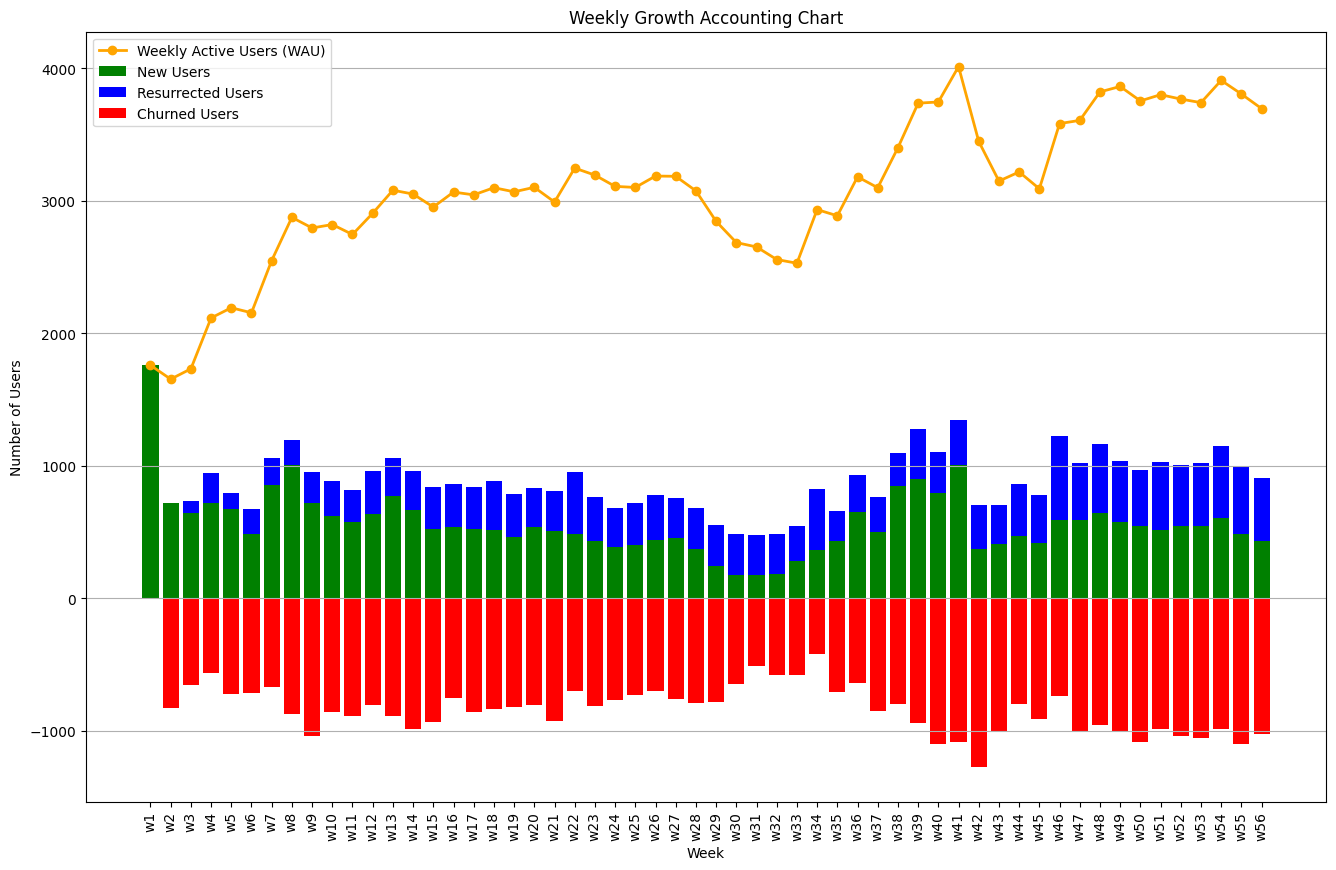

In [7]:
# Create the Weekly Growth Accounting chart
plt.figure(figsize=(16, 10))

# Plot new users
plt.bar(summary_df['Week'], summary_df['New Users'], label='New Users', color='green')

# Plot resurrected users
plt.bar(summary_df['Week'], summary_df['Resurrected Users'], label='Resurrected Users', bottom=summary_df['New Users'], color='blue')

# Plot churned users (negative values)
plt.bar(summary_df['Week'], -summary_df['Churned Users'], label='Churned Users', color='red')

# Plot WAU as a line plot
plt.plot(summary_df['Week'], summary_df['WAU'], label='Weekly Active Users (WAU)', color='orange', linewidth=2, marker='o')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Weekly Growth Accounting Chart')
plt.legend()
plt.xticks(rotation=90)
plt.grid(axis='y')


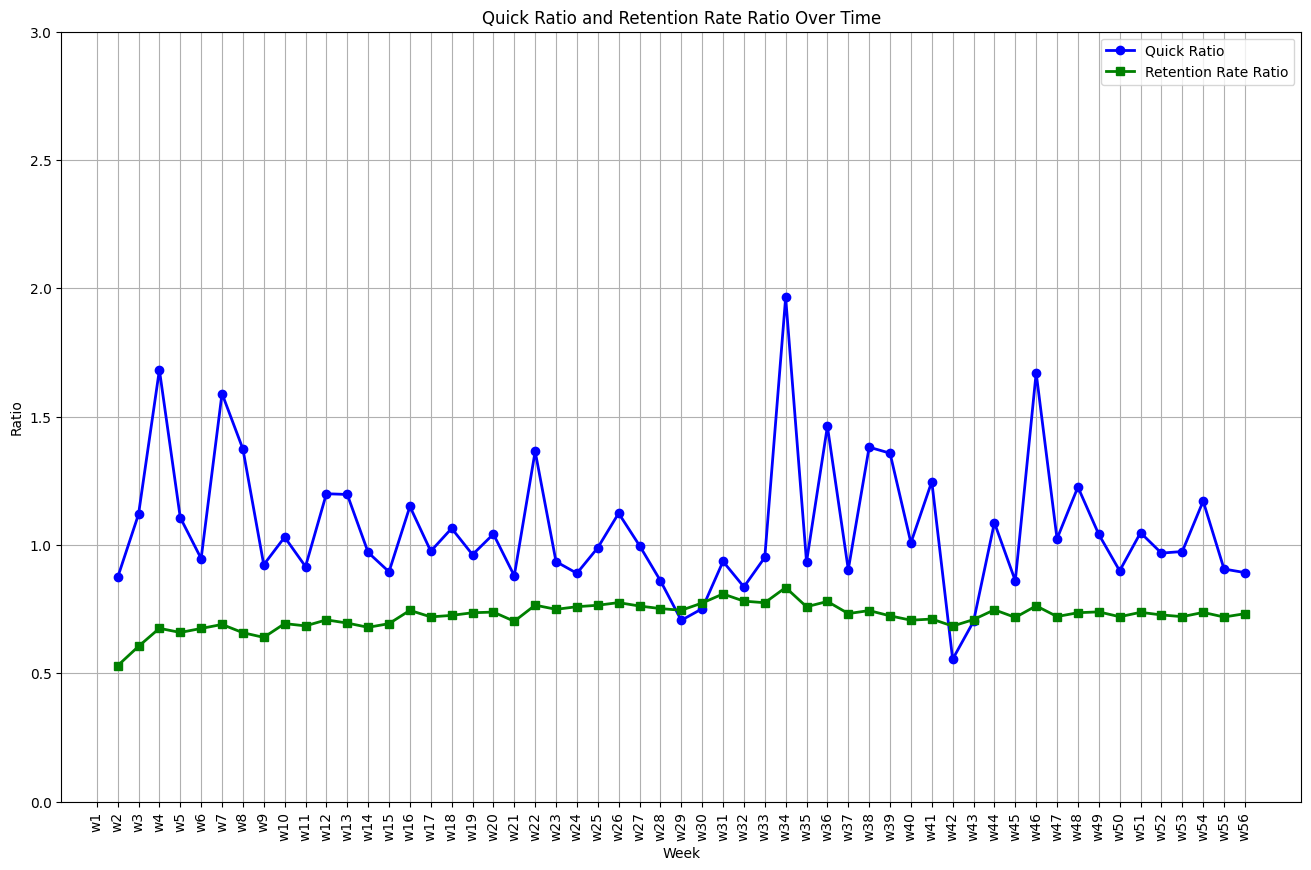

In [8]:
plt.figure(figsize=(16,10))

plt.plot(summary_df['Week'], summary_df['Quick Ratio'], label='Quick Ratio', color='blue', linewidth=2, marker='o')

plt.plot(summary_df['Week'], summary_df['Retention Rate Ratio'], label='Retention Rate Ratio', color='green', linewidth=2, marker='s')

plt.xlabel('Week')
plt.ylabel('Ratio')
plt.title('Quick Ratio and Retention Rate Ratio Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.ylim(0, 3)
plt.grid(True)

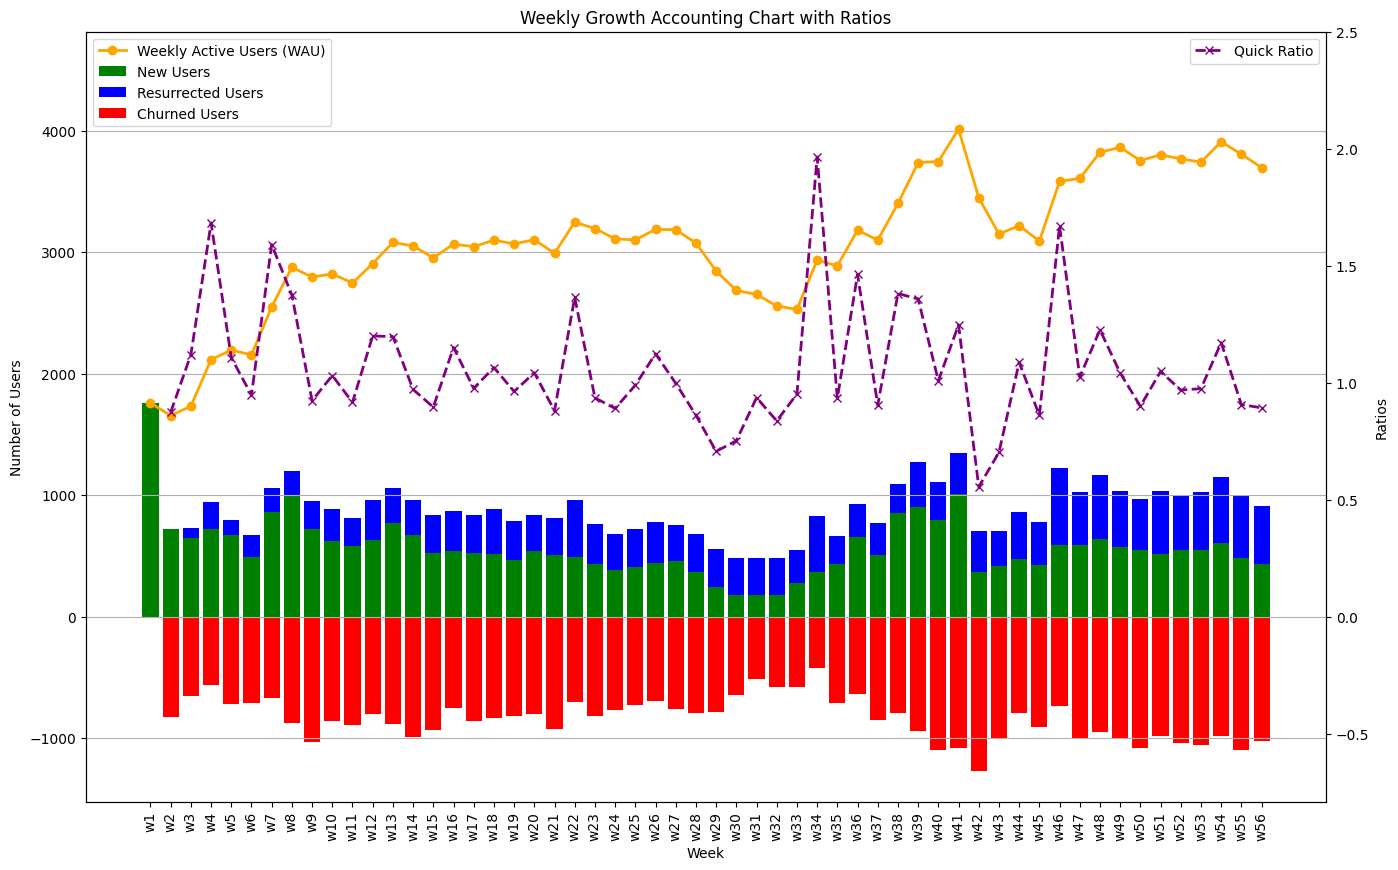

In [9]:
# Create the Weekly Growth Accounting chart with a secondary y-axis for the ratios
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot new users
ax1.bar(summary_df['Week'], summary_df['New Users'], label='New Users', color='green')

# Plot resurrected users
ax1.bar(summary_df['Week'], summary_df['Resurrected Users'], label='Resurrected Users', bottom=summary_df['New Users'], color='blue')

# Plot churned users (negative values)
ax1.bar(summary_df['Week'], -summary_df['Churned Users'], label='Churned Users', color='red')

# Plot WAU as a line plot
ax1.plot(summary_df['Week'], summary_df['WAU'], label='Weekly Active Users (WAU)', color='orange', linewidth=2, marker='o')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Week')
ax1.set_ylabel('Number of Users')
ax1.set_title('Weekly Growth Accounting Chart with Ratios')
ax1.legend(loc='upper left')
ax1.set_xticks(range(len(summary_df['Week'])))
ax1.set_xticklabels(summary_df['Week'], rotation=90)
ax1.grid(axis='y')

# Align the zeroes of both y-axes at the same level
max_users = max(max(summary_df['New Users'] + summary_df['Resurrected Users']), max(summary_df['WAU']))
max_churned = max(summary_df['Churned Users'])
ax1.set_ylim(bottom=-max_churned * 1.2, top=max_users * 1.2)

# Create a secondary y-axis for Quick Ratio
ax2 = ax1.twinx()
ax2.plot(summary_df['Week'], summary_df['Quick Ratio'], label='Quick Ratio', color='purple', linewidth=2, linestyle='--', marker='x')

ax2.set_ylabel('Ratios')

scale_factor = (max_users * 1.2) / 3.0
ax2.set_ylim(bottom=-max_churned / scale_factor, top=max_users / scale_factor)

ax2.legend(loc='upper right')

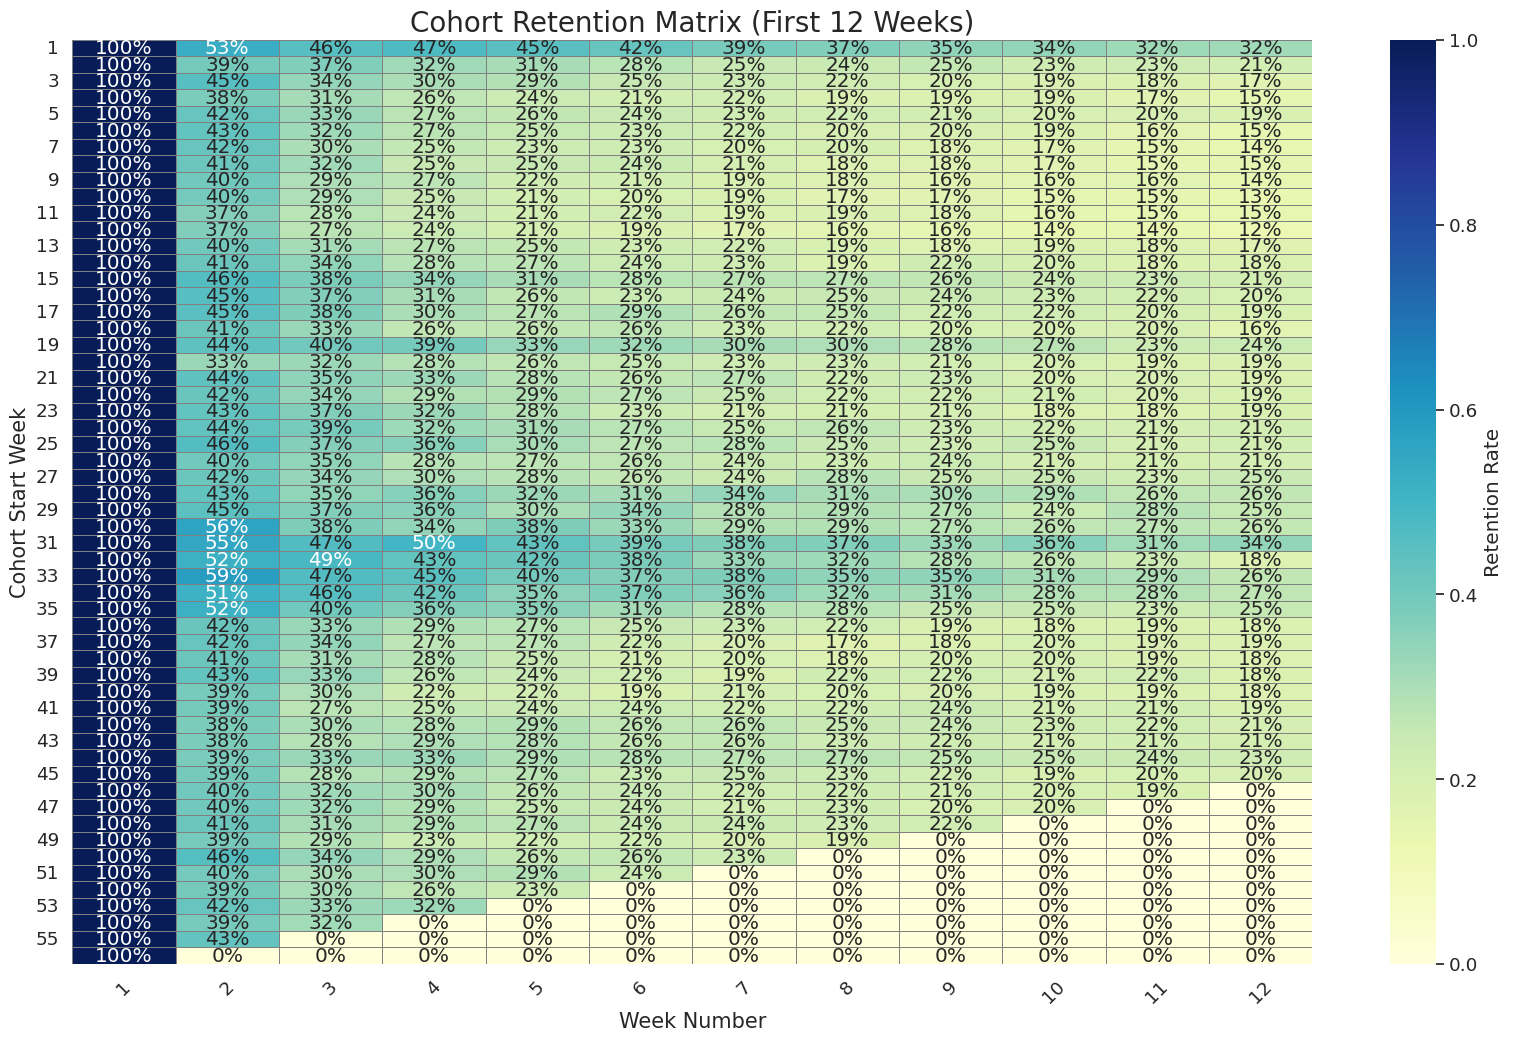

In [12]:
cohorts = {}

# Fill the cohorts dictionary with data
for week in range(1, 57):
    current_week = f'w{week}'
    for user in cleaned_data[current_week].dropna().unique():
        if user not in cohorts:
            cohorts[user] = week

# Create an empty DataFrame to store retention data
retention = pd.DataFrame(index=range(1, 57), columns=range(1, 13))  # Limit to 12 weeks for visualization

# Populate the retention DataFrame
for cohort_week in range(1, 57):
    cohort_users = {user for user, start_week in cohorts.items() if start_week == cohort_week}
    if not cohort_users:
        continue

    for week in range(cohort_week, min(cohort_week + 12, 57)):  # Only consider the first 12 weeks for each cohort
        current_week = f'w{week}'
        active_users = set(cleaned_data[current_week].dropna().unique())
        retained_users = cohort_users & active_users
        retention.loc[cohort_week, week - cohort_week + 1] = len(retained_users) / len(cohort_users)

# Fill NaN values with 0 for visualization purposes
retention.fillna(0, inplace=True)

# Set up the plot
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.heatmap(
    retention,
    annot=True,
    fmt='.0%',
    cmap='YlGnBu',
    cbar_kws={'label': 'Retention Rate'},
    linewidths=0.5,
    linecolor='gray'
)

# Add labels and title
plt.title('Cohort Retention Matrix (First 12 Weeks)', fontsize=20)
plt.xlabel('Week Number', fontsize=15)
plt.ylabel('Cohort Start Week', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()